<a href="https://colab.research.google.com/github/AmitK0105/AmitK0105/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

#import Seaborn as sn
#!pip install Seaborn
import seaborn as sn


In [ ]:
os.getcwd()
os.chdir("E:\JupyterNotebook")
os.getcwd()

In [ ]:
os.getcwd()

'E:\\JupyterNotebook'

In [ ]:
os.chdir("E:\JupyterNotebook")
os.getcwd()

'E:\\JupyterNotebook'

In [ ]:

df1_Book= pd.read_csv("Books.csv")
df1_Ratings= pd.read_csv("Ratings.csv")
#df1_Users= pd.read_csv("Users.csv", encoding='ISO-8859-1')
df1_Users= pd.read_csv("Users.csv", encoding='latin-1')

C:\Users\tgc\AppData\Local\Temp\ipykernel_15740\3279075344.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1_Book= pd.read_csv("Books.csv")


In [ ]:
df1_Users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
df1_Ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [ ]:
df1_Book.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Data points inside the file
print(df1_Book.shape)
print(df1_Users.shape)
print(df1_Ratings.shape)

(271360, 8)
(278858, 3)
(1048575, 3)


In [ ]:
# Is any missing value in Book files
df1_Book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
# Is any missing value in Users files
df1_Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
# Is any missing value in Rating files
df1_Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
df1_Book.duplicated().sum()

0

In [ ]:
df1_Users.duplicated().sum()

0

In [ ]:
df1_Ratings.duplicated().sum()

72

In [ ]:
df1_Ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5


In [ ]:
df1_Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
df1_Ratings.duplicated("Book-Rating")

0          False
1          False
2           True
3          False
4          False
           ...  
1048570     True
1048571     True
1048572     True
1048573     True
1048574     True
Length: 1048575, dtype: bool

In [ ]:
#plt.bar("Book-Rating", "ISBN")

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

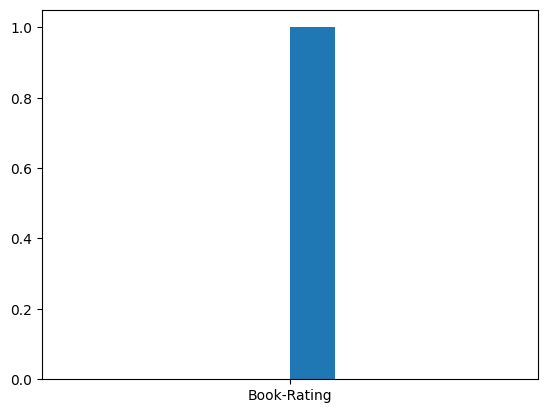

In [ ]:
plt.hist("Book-Rating")

In [ ]:
#plt.gca()

In [ ]:
df1_Book.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
df1_Book.groupby(by="Year-Of-Publication").count()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Year-Of-Publication,,,,,,,
0,3570,3570,3570,3570,3570,3570,3570
1806,1,1,1,1,1,1,1
1900,1,1,1,1,1,1,1
1901,7,7,7,7,7,7,7
1902,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
2024,1,1,1,1,1,1,1
2030,3,3,3,3,3,3,3
2037,1,1,1,1,1,1,1


In [ ]:
df1_Book.groupby(by="Year-Of-Publication").sum()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Year-Of-Publication,,,,,,,
0,3150000335342311360X57119763935962146298845229...,Kabale Und LiebeDie Liebe in Den ZeltenPoisonw...,SchillerGabriel Garcia MarquezBarbara Kingsolv...,"Philipp Reclam, Jun Verlag GmbHDeutscher Tasch...",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
1806,781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,Reprint Services Corp,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...
1900,B0000VZEFK,Is That a Gun in Your Pocket?: Women's Experie...,Rachel Abramowitz,Random House,http://images.amazon.com/images/P/B0000VZEFK.0...,http://images.amazon.com/images/P/B0000VZEFK.0...,http://images.amazon.com/images/P/B0000VZEFK.0...
1901,6714933106714071046710683506717290126711895066...,MOST SJ PERELMAN PLAST TEMP CHRISTCLBASIC WRTN...,S.J. PerelmanNikos KazantzakisBertrand Russell...,FiresideSimon &amp; SchusterSimon &amp; Schust...,http://images.amazon.com/images/P/0671493310.0...,http://images.amazon.com/images/P/0671493310.0...,http://images.amazon.com/images/P/0671493310.0...
1902,373226888841499306,"Tommy's MomCharlotte Bronte, George Eliot and ...",Linda O. JohnstonHenry H. Bonnell,HarlequinFolcroft Library Editions,http://images.amazon.com/images/P/0373226888.0...,http://images.amazon.com/images/P/0373226888.0...,http://images.amazon.com/images/P/0373226888.0...
...,...,...,...,...,...,...,...
2024,380000059,CLOUT,D. GIBBONS,Avon,http://images.amazon.com/images/P/0380000059.0...,http://images.amazon.com/images/P/0380000059.0...,http://images.amazon.com/images/P/0380000059.0...
2030,671266500684718022671740989,FOREST PEOPLE (Touchstone Books (Hardcover))In...,Colin M. TurnbullErnest HemingwayBill Gutman,Simon &amp; SchusterCollier BooksSimon &amp; S...,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...
2037,068471809X,To Have and Have Not,Ernest Hemingway,Simon &amp; Schuster,http://images.amazon.com/images/P/068471809X.0...,http://images.amazon.com/images/P/068471809X.0...,http://images.amazon.com/images/P/068471809X.0...


In [ ]:
#filter=df1_Book["Year-Of-Publication"]==2024
#df1_Book.where(filter, inplace=False)
#df1_Book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


## Popularity based Recommender System

In [ ]:
## Criteria--We will consider only those book for which minimum voting count should be 250
## we will find out top 50 book for which the minmum voting should ve 250

In [ ]:
df1_Ratings.merge(df1_Book,how="left", on="ISBN").shape

(1048575, 10)

In [ ]:
Rate_book= df1_Ratings.merge(df1_Book,how="left", on="ISBN")

In [ ]:
Rate_book.groupby("Book-Title").count()["Book-Rating"]
# A series output
#Rate_book
Rate_book.shape

(1048575, 10)

In [ ]:
Num_Rating_Df = Rate_book.groupby("Book-Title").count()["Book-Rating"].reset_index()
Num_Rating_Df.rename(columns={"Book-Rating":"Num-Rating"}, inplace=True)
Num_Rating_Df.shape
#Num_Rating_Df.head(3)

(230223, 2)

In [ ]:
Rate_book.dtypes
#Rate_book.head(2)
#Avg_Rating_Df= Rate_book.groupby("Book-Title").mean()["Book-Rating"]
#Avg_Rating_Df= Rate_book.groupby("Book-Title").mean()["Book-Rating"].reset_index()
#Avg_Rating_Df.rename(columns={"Book-Rating":"Avg-Rating"}, inplace=True)
#Avg_Rating_Df.shape
#Avg_Rating_Df

Avg_Rating_Df=Rate_book.groupby("Book-Title").agg({"Book-Rating": "mean"}).reset_index()
Avg_Rating_Df.rename(columns={"Book-Rating":"Avg-Rating"}, inplace=True)
Avg_Rating_Df.shape
Avg_Rating_Df

,Book-Title,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,Beyond IBM: Leadership Marketing and Finance ...,0.000000
4,Clifford Visita El Hospital (Clifford El Gran...,0.000000
...,...,...
230218,voyage fatal,0.000000
230219,waking blood,6.000000
230220,"wet sand, raven tracks",4.000000
230221,whataboutrick.com: a poetic tribute to Richard...,2.500000


In [ ]:
Popular_Df= Num_Rating_Df.merge(Avg_Rating_Df, on="Book-Title")
Popular_Df.shape
Popular_Df.head(2)

,Book-Title,Num-Rating,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00


In [ ]:
Popular_Df= Popular_Df[Popular_Df["Num-Rating"]>=250].sort_values("Avg-Rating", ascending=False).head(50)

In [ ]:
Popular_Df.merge(df1_Book, on="Book-Title").drop_duplicates("Book-Title")

,Book-Title,Num-Rating,Avg-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Goblet of Fire (Book 4),346,5.945087,439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),380,5.884211,439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
5,Harry Potter and the Order of the Phoenix (Boo...,316,5.544304,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
9,Harry Potter and the Chamber of Secrets (Book 2),501,5.177645,439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
12,The Hobbit : The Enchanting Prelude to The Lor...,261,4.969349,345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
13,Harry Potter and the Sorcerer's Stone (Harry P...,519,4.938343,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
15,The Fellowship of the Ring (The Lord of the Ri...,340,4.885294,345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
24,To Kill a Mockingbird,463,4.684665,446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...
32,The Da Vinci Code,828,4.679952,385504209,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
38,The Catcher in the Rye,401,4.615960,316769487,J.D. Salinger,1991,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...


In [ ]:
Popular_Df.merge(df1_Book, on="Book-Title").drop_duplicates("Book-Title").shape

In [ ]:
Popular_Df=Popular_Df.merge(df1_Book, on="Book-Title").drop_duplicates("Book-Title")[["Book-Title","Num-Rating","Avg-Rating","Book-Author", "Year-Of-Publication","Image-URL-M"]]

In [ ]:
## Collaborative Filtering based Recommender Approcah
# Criteria:-1 Will only consider the rating of those users who rated atleast 200 books
# Criteria:-2 Only those books will be consider for which minimum no of rating is 50


## Collaborative Filtering based Recommender

In [ ]:
x=Rate_book.groupby("User-ID").count()["Book-Rating"]>200
x[x] # Boolean Indexing
#x[x].index
Intell_users= x[x].index
Filtered_Rating= Rate_book[Rate_book["User-ID"].isin(Intell_users)]

In [ ]:
H=Filtered_Rating.groupby("Book-Title").count()["Book-Rating"]>=50
Famous_Book= H[H].index

In [ ]:
Final_Rating= Filtered_Rating[Filtered_Rating["Book-Title"].isin(Famous_Book)]

In [ ]:
Final_Rating.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1456,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1469,277427,60930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1471,277427,60934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1474,277427,61009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1480,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1048549,250764,449907481,0,A Thousand Acres (Ballantine Reader's Circle),JANE SMILEY,1992,Ballantine Books,http://images.amazon.com/images/P/0449907481.0...,http://images.amazon.com/images/P/0449907481.0...,http://images.amazon.com/images/P/0449907481.0...
1048556,250764,451180410,0,Mortal Fear,Greg Iles,1998,Signet Book,http://images.amazon.com/images/P/0451180410.0...,http://images.amazon.com/images/P/0451180410.0...,http://images.amazon.com/images/P/0451180410.0...
1048558,250764,451191013,0,The Regulators,Stephen King,2002,Signet Book,http://images.amazon.com/images/P/0451191013.0...,http://images.amazon.com/images/P/0451191013.0...,http://images.amazon.com/images/P/0451191013.0...
1048560,250764,451192001,0,How Stella Got Her Groove Back,Terry McMillan,1997,Signet Book,http://images.amazon.com/images/P/0451192001.0...,http://images.amazon.com/images/P/0451192001.0...,http://images.amazon.com/images/P/0451192001.0...


In [ ]:
Pivot_Table= Final_Rating.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

In [ ]:
Pivot_Table.fillna(0,inplace=True)

In [ ]:
Pivot_Table

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,249628,249862,249894,250184,250405,250764,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
Simlarity_score= cosine_similarity(Pivot_Table)

In [ ]:
cosine_similarity(Pivot_Table).shape

In [ ]:
Simlarity_score[0] # Simlarity score of the 1st book in the Array

array([1.        , 0.10127551, 0.01191739, 0.        , 0.09583681,
       0.05173085, 0.02877335, 0.0791929 , 0.12838162, 0.03143707,
       0.03534929, 0.07136661, 0.02086867, 0.09220631, 0.07485912,
       0.11035871, 0.05157336, 0.02426713, 0.11598202, 0.        ,
       0.13355774, 0.07751845, 0.07213694, 0.0853263 , 0.        ,
       0.07166096, 0.13610168, 0.1188721 , 0.0643839 , 0.01536629,
       0.08549914, 0.04699735, 0.01537143, 0.09474864, 0.01797295,
       0.02351172, 0.07924531, 0.11403485, 0.05191784, 0.08051974,
       0.01423186, 0.08718718, 0.05286648, 0.29770502, 0.09911559,
       0.05381717, 0.12085558, 0.0585411 , 0.07623366, 0.04201062,
       0.0188022 , 0.        , 0.05572653, 0.00552641, 0.0765438 ,
       0.05312134, 0.1861993 , 0.        , 0.0126301 , 0.02957537,
       0.04179859, 0.08143972, 0.15055133, 0.        , 0.12761098,
       0.06376187, 0.        , 0.10571345, 0.02851372, 0.04694769,
       0.06627412, 0.11371691, 0.03133157, 0.0134655 , 0.24948